## This notebook will be used for making some preliminary plots and exploring the features of the data set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


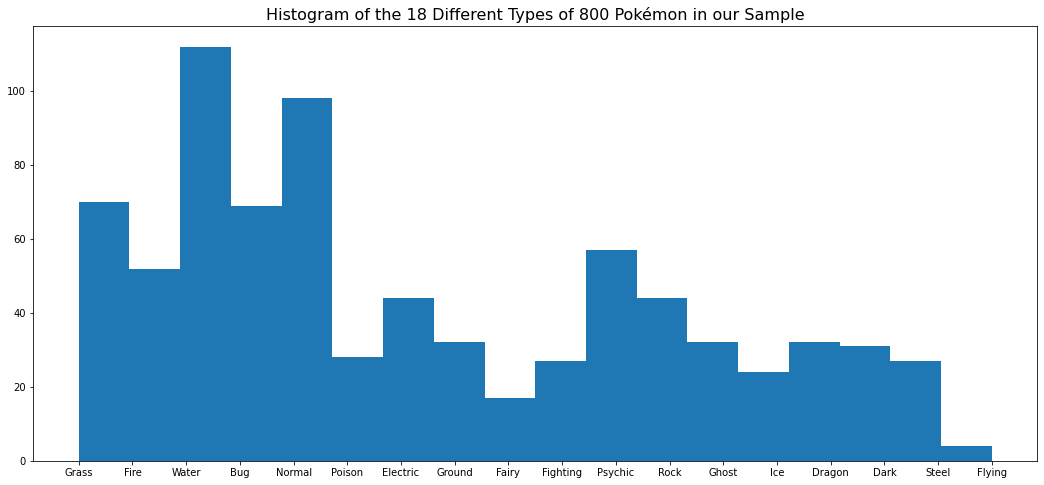

In [10]:
poke_type = data['Type 1']
plt.figure(figsize = [18,8])
plt.hist(poke_type, bins = 18)
plt.title('Histogram of the 18 Different Types of 800 Pokémon in our Sample', fontsize = 16)
plt.savefig('Poke_hist.png')

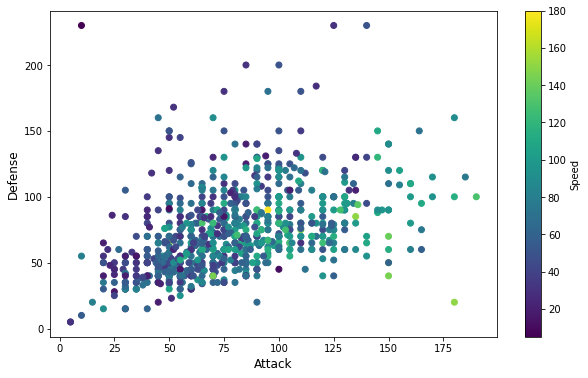

In [4]:
attack = data['Attack']
defense = data['Defense']
speed = data['Speed']
plt.figure(figsize = [10,6])
plt.scatter(attack, defense, c = speed, cmap = 'viridis')
plt.colorbar(label = 'Speed')
plt.xlabel('Attack', fontsize = 12)
plt.ylabel('Defense', fontsize = 12)
plt.savefig('atk_vs_def_vs_speed.png')

### Let's explore the feature space of Fire types and Water types

Text(0.5, 0, 'Attack')

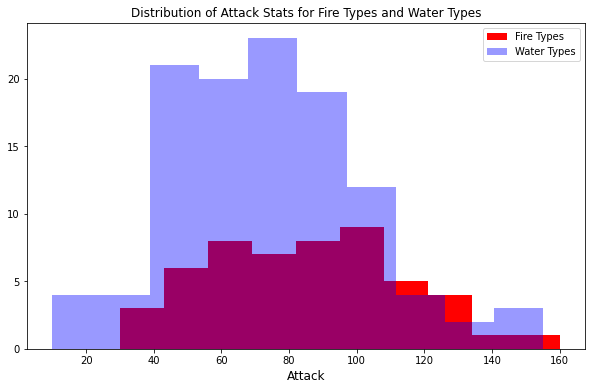

In [58]:
fire_ix = np.where(poke_type == 'Fire')[0]
water_ix = np.where(poke_type == 'Water')[0]
plt.figure(figsize = [10,6])
plt.hist(attack[fire_ix],color = 'r', label = 'Fire Types')
plt.hist(attack[water_ix],color = 'b', alpha = 0.4, label = 'Water Types')
plt.legend()
plt.title('Distribution of Attack Stats for Fire Types and Water Types', fontsize = 12)
plt.xlabel('Attack', fontsize = 12)

#### A quick hypothesis test:
Consider the histograms plotted above to be the populations of Water types and Fire types. Can we say with 95% confidence that Fire types typically have a higher attack?

Let $\mu_{atk,fire} $ be the mean attack stat of the population of Fire pokémon, and let $\mu_{atk,water}$ be the mean attack stat of the population of Water pokémon.

$H_{0}$ : Fire types do not have a higher attack that Water types. $\rightarrow \mu_{atk,fire} = \mu_{atk,water}$

$H_{a}$ : Fire types $\textit{do}$ have a higher attack than Water types. $\rightarrow \mu_{atk,fire} > \mu_{atk,water}$

Compute $\mu_{atk,fire}$ , $\mu_{atk,water}$ , $\sigma_{atk,fire}$ , and  $\sigma_{atk,water}$ :

In [44]:
def compute_stats(element, stat):
    '''
    Computes mean and standard deviation of a particular physical stat (attack, defense, speed, etc.)
    for a given element/Pokémon type (fire, water, electric, etc.).
    Both arguments should be strings.
    '''
    ix = np.where(data['Type 1'] == element)[0]
    attribute = data[stat]
    mu = np.sum(attribute[ix]) / len(ix)
    sigma = np.sqrt( (1/len(ix)) * np.sum( (attribute[ix]-mu)**2) )
    
    return mu, sigma
    

In [45]:
mu_atk_fire, sigma_atk_fire = compute_stats('Fire', 'Attack')
mu_atk_water, sigma_atk_water = compute_stats('Water', 'Attack')

if mu_atk_fire > mu_atk_water:
    print(True)

True


How do we incorporate the p-value into this type of problem?

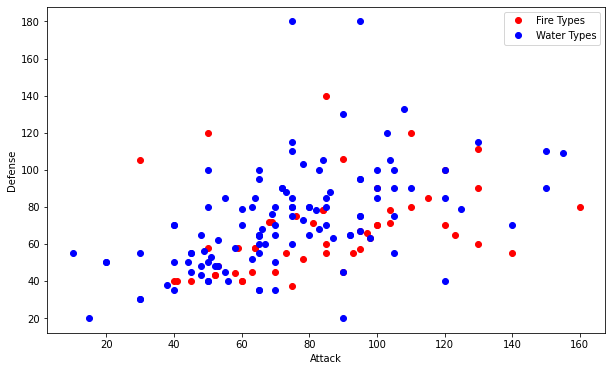

In [8]:
plt.figure(figsize = [10,6])
plt.plot(attack[fire_ix], defense[fire_ix], 'r.', markersize = 12, label = 'Fire Types')
plt.plot(attack[water_ix], defense[water_ix], 'b.', markersize = 12, label = 'Water Types')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()

#### Another question that can be quickly answered: 
If we distribute one of each Pokémon in the population in a field, what are the odds of finding a particular type?

In [42]:
df = {}
poke_types = []
N = []
P = []
for element in np.unique(poke_type):
    ix = np.where(poke_type == element)[0]
    poke_types += [element]
    N += [len(ix)]
    P += [len(ix)/len(data)]
    
    
df = pd.DataFrame({'Type':poke_types, 'N': N, 'P (random encounter)': P})
df

,Type,N,P (random encounter)
0,Bug,69,0.08625
1,Dark,31,0.03875
2,Dragon,32,0.04000
3,Electric,44,0.05500
4,Fairy,17,0.02125
5,Fighting,27,0.03375
6,Fire,52,0.06500
7,Flying,4,0.00500
8,Ghost,32,0.04000
9,Grass,70,0.08750
